===========================================
ANÁLISE EXPLORATÓRIA DATASET TITANIC
===========================================

Objetivo:
Analisar o perfil dos passageiros do Titanic e comparar características entre sobreviventes e não sobreviventes.

Etapas da Análise
1 - Visão geral do dataset
2 - Perfil dos passageiros
3 - Análise de sobrevivência por sexo, classe e idade
4 - Análise por porto de embarque

In [ ]:
#iniciando a biblioteca pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [177]:
#lendo o arquivo csv e armazenando em um dataframe
df = pd.read_csv('../Src/titanic_dataset.csv')

In [ ]:
#exibindo as primeiras linhas do dataframe
print("VISÃO GERAL DO DATASET")
print ("\n")
print("10 Primeiros registros")
print(tabulate(df.head(10), headers=df.columns, tablefmt="grid"))
print("---------------------------------------------------------")
print("\n")

Apresentando outras informações do dataset

In [59]:
#Exibindo informações sobre a estrutura do dataset
print("Estrutura")
# cria DataFrame com informações detalhadas
info_df = pd.DataFrame({
    "Column": df.columns,
    "Dtype": df.dtypes.values,
    "Non-Null Count": df.notnull().sum().values,
    "Null Count": df.isnull().sum().values,
})

# exibe em formato tabular
print(tabulate(info_df, headers="keys", tablefmt="grid"))



#Exibindo a quantidade de linhas e colunas do dataframe
linhas = (df.shape[0])
print(f"Total de registros: {linhas}")

#Verificando a quantidade de linhas repetidas no dataframe
linhas_repetidas = df.duplicated().sum()
print(f"Registros duplicados: {linhas_repetidas}")
print("---------------------------------------------------------")
print("\n")

Estrutura
+----+-------------+---------+------------------+--------------+
|    | Column      | Dtype   |   Non-Null Count |   Null Count |
+====+=============+=========+==================+==============+
|  0 | PassengerId | int64   |              891 |            0 |
+----+-------------+---------+------------------+--------------+
|  1 | Survived    | int64   |              891 |            0 |
+----+-------------+---------+------------------+--------------+
|  2 | Pclass      | int64   |              891 |            0 |
+----+-------------+---------+------------------+--------------+
|  3 | Name        | str     |              891 |            0 |
+----+-------------+---------+------------------+--------------+
|  4 | Sex         | str     |              891 |            0 |
+----+-------------+---------+------------------+--------------+
|  5 | Age         | float64 |              714 |          177 |
+----+-------------+---------+------------------+--------------+
|  6 | SibSp   

preparação e tratamento dos dados, incluindo a verificação e o tratamento de valores nulos ou duplicados, ajustes de tipagem e organização das colunas.

Tratatando os valores nulos

Tratatando os valores nulos para idade (177 ocorrências)

In [ ]:
#cria uma cópia do df substituindo os valores nulos da coluna 'Age' pela mediana
df = df.assign(Age=df["Age"].fillna(df["Age"].median()))

print("Os valores nulos do atributo AGE foram substituídos pela MEDIANA da coluna, que é", df["Age"].median())

Os valores nulos do atributo IDADE foram substituídos pela mediana da coluna, que é 28.0


Tratadando os valores nulos para Porto de Embarque

In [90]:
df = df.assign(Embarked=df["Embarked"].fillna(df["Embarked"].mode()))
print("Os valores nulos do atributo EMBARKED foram substituídos pela moda da coluna, que é", df["Embarked"].mode()[0])

Os valores nulos do atributo EMBARKED foram substituídos pela moda da coluna, que é S


Excluindo as colunas cabine, ticket e fare da análise

In [178]:
print("O atributo Cabine foi excluído devido ao grande número de dados nulos.")
#excluir a coluna 'Cabin' do dataframe
df = df.drop(columns=['Cabin'])

#excluir as colunas 'Ticket' e 'Fare' do dataframe
print("Os atributos TICKET e FARE, identificação do número do ticket e do valor da taxa respectivamente, foram excluídos por terem sido considerados irrelevantes para esta análise.")
df = df.drop(columns=['Ticket', 'Fare'])

O atributo Cabine foi excluído devido ao grande número de dados nulos.
Os atributos TICKET e FARE, identificação do número do ticket e do valor da taxa respectivamente, foram excluídos por terem sido considerados irrelevantes para esta análise.


A análise deverá envolver a compreensão das variáveis, a aplicação de fi ltros, ordenações e agrupamentos (GroupBy), bem como a construção de pelo menos uma visualização gráfi ca que represente a distribuição dos dados ou a relação entre variáveis relevantes, utilizando a linguagem Python e bibliotecas adequadas ao contexto da análise exploratória.

##Renomeando as colunas para tornar o dataset mais legível

A ordem dos atributos e foram alterados de acordo com o seguinte:


In [ ]:
#alterado a ordem das colunas
df = df[['PassengerId','Name', 'Sex', 'Age', 'Pclass', 'Embarked', 'Survived','SibSp', 'Parch']]

#renomeando as colunas do dataframe
df.columns = ['ID_Passageiro',
              'Nome',
              'Genero',
              'Idade',
              'Classe',
              'Porto_Embarque',
              'Sobrevivente',
              'Irmãos_Esposas_Bordo',
              'Pais_Filhos_Bordo']

# Informando o novo valor das colunas do dataset Titanic para português
# Colunas originais do dataset Titanic
colunas_originais = [
    'PassengerId','Name', 'Sex', 'Age', 'Pclass', 'Embarked', 'Survived','SibSp', 'Parch'
]

# Novo Valor
colunas_novas = [
    'ID_Passageiro','Nome','Genero','Idade','Classe','Porto_Embarque','Sobrevivente','Irmãos_Esposas_Bordo', 'Pais_Filhos_Bordo'
]

# Criar DataFrame comparativo
df_colunas = pd.DataFrame({
    "Original": colunas_originais,
    "Novo Valor": colunas_novas
})
print("A ordem e descrição dos atributos e foram alterados de acordo com o seguinte:")
print(tabulate(df_colunas, headers=df_colunas.columns, tablefmt="grid"))

A ordem dos atributos e foram alterados de acordo com o seguinte:
+----+-------------+----------------------+
|    | Original    | Novo Valor           |
+====+=============+======================+
|  0 | PassengerId | ID_Passageiro        |
+----+-------------+----------------------+
|  1 | Name        | Nome                 |
+----+-------------+----------------------+
|  2 | Sex         | Genero               |
+----+-------------+----------------------+
|  3 | Age         | Idade                |
+----+-------------+----------------------+
|  4 | Pclass      | Classe               |
+----+-------------+----------------------+
|  5 | Embarked    | Porto_Embarque       |
+----+-------------+----------------------+
|  6 | Survived    | Sobrevivente         |
+----+-------------+----------------------+
|  7 | SibSp       | Irmãos_Esposas_Bordo |
+----+-------------+----------------------+
|  8 | Parch       | Pais_Filhos_Bordo    |
+----+-------------+----------------------+


Alterando os dados da tabela para tornar mais legível

In [180]:
#substituindo os valores da coluna 'Sobrevivente' para 'Sobrevivente" e 'Não Sobrevivente'
df['Sobrevivente'] = df['Sobrevivente'].replace({0: 'Não Sobrevivente', 1: 'Sobrevivente'})
print("Os valores da coluna 'Sobrevivente' - '0' e '1' - foram substituídos por 'Não Sobrevivente' e 'Sobrevivente' respectivamente.")

#substituindo os valores da coluna 'Genero' para 'Masculino' e 'Feminino'
df['Genero'] = df['Genero'].replace({'male': 'Masculino', 'female': 'Feminino'})
print("Os valores da coluna Genero - 'male' e 'female' - foram substituidos por 'Masculino' e 'Feminino' respectivamente.")

#substituindo os valores da coluna 'Porto_Embarque' para 'Southampton', 'Cherbourg' e 'Queenstown'
df['Porto_Embarque'] = df['Porto_Embarque'].replace({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})
print("Os valores da coluna Porto_Embarque - 'S', 'C' e 'Q' - foram substituídos por 'Southampton', 'Cherbourg' e 'Queenstown' respectivamente.")


Os valores da coluna 'Sobrevivente' - '0' e '1' - foram substituídos por 'Não Sobrevivente' e 'Sobrevivente' respectivamente.
Os valores da coluna Genero - 'male' e 'female' - foram substituidos por 'Masculino' e 'Feminino' respectivamente.
Os valores da coluna Porto_Embarque - 'S', 'C' e 'Q' - foram substituídos por 'Southampton', 'Cherbourg' e 'Queenstown' respectivamente.


In [181]:
print("Dataset resultado após as alterações:")
#exibindo as primeiras linhas do dataframe
print(tabulate(df.head(10), headers=df.columns, tablefmt="grid"))


Dataset resultado após as alterações:
+----+-----------------+-----------------------------------------------------+-----------+---------+----------+------------------+------------------+------------------------+---------------------+
|    |   ID_Passageiro | Nome                                                | Genero    |   Idade |   Classe | Porto_Embarque   | Sobrevivente     |   Irmãos_Esposas_Bordo |   Pais_Filhos_Bordo |
+====+=================+=====================================================+===========+=========+==========+==================+==================+========================+=====================+
|  0 |               1 | Braund, Mr. Owen Harris                             | Masculino |      22 |        3 | Southampton      | Não Sobrevivente |                      1 |                   0 |
+----+-----------------+-----------------------------------------------------+-----------+---------+----------+------------------+------------------+------------------------+

Analise comparativa entre a população que embarcou e população que sobreviveu

Total de passageiros embarcados: 891
Total sobrevivente: 342 (38.38%)
Total não sobrevivente: 549 (61.62%)


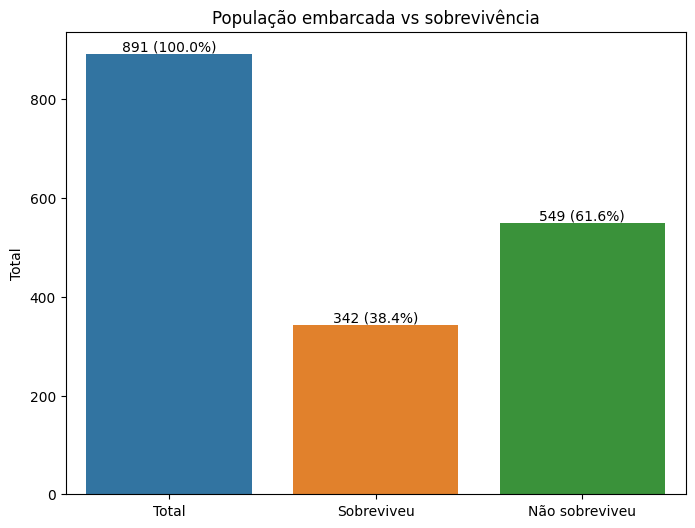

In [67]:
#POPULAÇÃO QUE EMBARCOU X POPULAÇÃO QUE SOBREVIVEU
# Totais absolutos
total_embarcados = len(df)
total_sobreviventes = (df['Sobrevivente'] == 'Sobrevivente').sum()
total_nao_sobreviventes = (df['Sobrevivente'] == 'Não Sobrevivente').sum()

#calcula a proporção de sobreviventes em relação ao total de passageiros
Proporcao = df['Sobrevivente'].value_counts(normalize=True)
proporcao_sobreviveu = Proporcao['Sobrevivente'] * 100
proporcao_nao_sobreviveu = Proporcao['Não Sobrevivente'] * 100

#mostra total de passageiros embarcados, total de sobreviventes e total de não sobreviventes, além das proporções
print(f"Total de passageiros embarcados: {total_embarcados}")
print(f"Total sobrevivente: {total_sobreviventes}"+f" ({proporcao_sobreviveu:.2f}%)")
print(f"Total não sobrevivente: {total_nao_sobreviventes}"+f" ({proporcao_nao_sobreviveu:.2f}%)")


# Criar DataFrame para o gráfico
dados = pd.DataFrame({
    'Total': [total_embarcados],
    'Sobreviveu': [total_sobreviventes],
    'Não sobreviveu': [total_nao_sobreviventes]
})
plt.figure(figsize=(8, 6))
plt.title("População embarcada vs sobrevivência")
plt.ylabel("Total") #altera o rótulo do eixo Y para "Total"
ax = sns.barplot(data=dados)

# Adicionar os totais e porcentagens em cima das barras
for p in ax.patches:
    height = p.get_height()
    percent = (height / total_embarcados) * 100
    ax.annotate(f'{int(height)} ({percent:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')


plt.show()



Analise comparativa entre a população que embarcou e população que sobreviveu por gênero

Totais de homens e mulheres que embarcaram:
Total masculino: 577 (64.76%)
Total feminino: 314 (35.24%)


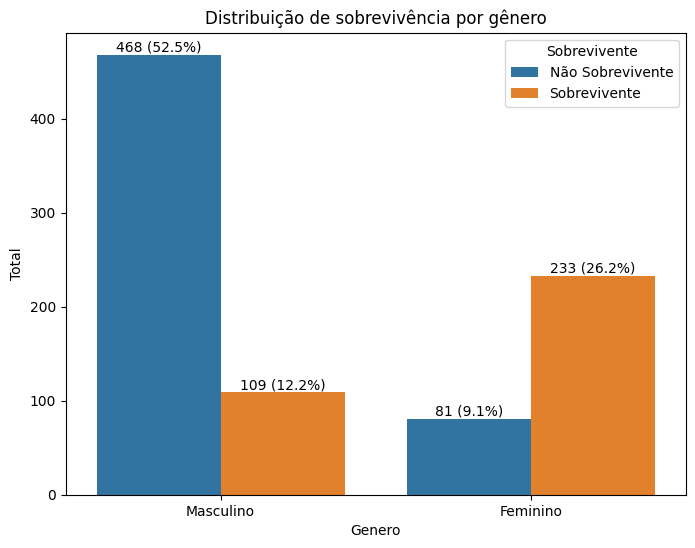

In [68]:
#POPULAÇÃO QUE EMBARCOU X POPULAÇÃO QUE SOBREVIVEU POR GÊNERO

#EMBARCARAM
print("Totais de homens e mulheres que embarcaram:")

#soma a quantidade de ocorrencias de cada genero
Total_masculino = df['Genero'].value_counts()['Masculino']
Total_feminino = df['Genero'].value_counts()['Feminino']

#calcula a proporção de cada genero em relação ao total de passageiros
Proporcao = df['Genero'].value_counts(normalize=True)
proporcao_masculino = Proporcao['Masculino'] * 100
proporcao_feminino = Proporcao['Feminino'] * 100

#mostra total e proporção de cada genero
print(f"Total masculino: {Total_masculino}"+f" ({proporcao_masculino:.2f}%)")
print(f"Total feminino: {Total_feminino}"+f" ({proporcao_feminino:.2f}%)")



#SOBREVIVENTES
#filtrando o dataframe para obter apenas os sobreviventes
sobreviventes = df[df['Sobrevivente'] == 'Sobrevivente']
sobreviventes['Genero'].value_counts(normalize=True)

# Comparação por genero
pd.crosstab(df['Genero'], df['Sobrevivente'], normalize='index')

# Criando a figura do gráfico
plt.figure(figsize=(8, 6))

#Configurações do gráfico
plt.title("Distribuição de sobrevivência por gênero")
plt.ylabel("Total") #altera o rótulo do eixo Y para "Total"
ax = sns.countplot(x='Genero', hue='Sobrevivente', data=df)

#inclui os totais da quantidade de sobreviventes e não sobreviventes em cada barra do gráfico
#em valores inteiros
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # só anota se a barra tiver altura > 0 por que estavam aparecendo valores zerados no gráfico
        percent = (height / total_embarcados) * 100
        ax.annotate(f'{int(height)} ({percent:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')


plt.show()

Analise comparativa entre a população que embarcou e população que sobreviveu por idade

Resumo estatístico dos dados sobre Idade:
+-------------------------------------------+----------+
| Estatística                               |    Valor |
+===========================================+==========+
| Total de passageiros com idade registrada | 891      |
+-------------------------------------------+----------+
| Média                                     |  29.3616 |
+-------------------------------------------+----------+
| Desvio padrão                             |  13.0197 |
+-------------------------------------------+----------+
| Idade mínima                              |   0.42   |
+-------------------------------------------+----------+
| 25% - 1º Quartil                          |  22      |
+-------------------------------------------+----------+
| 50% - Mediana                             |  28      |
+-------------------------------------------+----------+
| 75% - 3º Quartil                          |  35      |
+-------------------------------------------+-

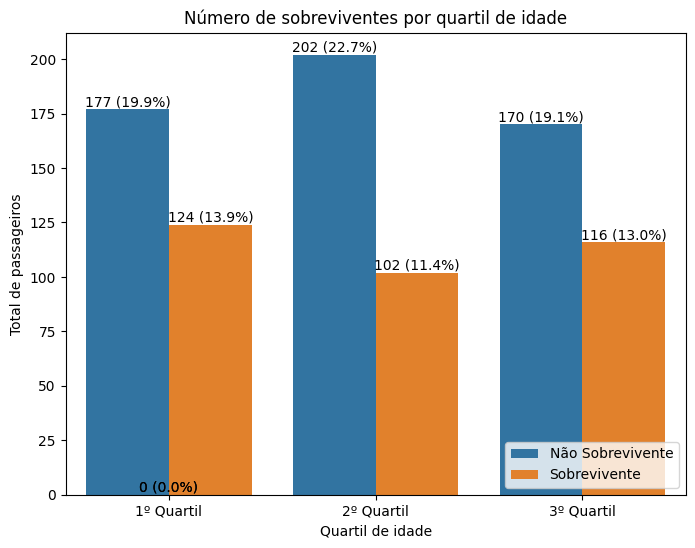

In [69]:
#distribuição de frequências da coluna idade
#resumo estatístico da coluna Idade
print("Resumo estatístico dos dados sobre Idade:")

dados = df['Idade'].describe()
dados = dados.rename({
    'count': 'Total de passageiros com idade registrada',
    'mean': 'Média',
    'std': 'Desvio padrão',
    'min': 'Idade mínima',
    '25%': '25% - 1º Quartil',
    '50%': '50% - Mediana',
    '75%': '75% - 3º Quartil',
    'max': 'Idade máxima'
})

#imprime o resumo estatístico da coluna Idade em formato de tabela
print(tabulate(dados.to_frame(), headers=["Estatística", "Valor"], tablefmt="grid"))

# Criar quartis de idade
df['Quartil_Idade'] = pd.qcut(df['Idade'], q=3, labels=['1º Quartil','2º Quartil','3º Quartil'])

# contar totais por quartil
total_por_quartil = df.groupby('Quartil_Idade').size().reset_index(name='Total')

# Contar totais sobreviventes por quartil
sobreviventes_por_quartil = df[df['Sobrevivente'] == 'Sobrevivente'].groupby('Quartil_Idade').size().reset_index(name='Total')

# Contar totais nao sobreviventes por quartil
nao_sobreviventes_por_quartil = df[df['Sobrevivente'] == 'Não Sobrevivente'].groupby('Quartil_Idade').size().reset_index(name='Total')

#print('Total de passageiros por quartil de idade:')
#print(total_por_quartil)

#print("Número de sobreviventes por quartil de idade:")
#print(sobreviventes_por_quartil)

#print("Número de não sobreviventes por quartil de idade:")
#print(nao_sobreviventes_por_quartil)

# Gráfico
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Quartil_Idade', hue='Sobrevivente', data=df)

plt.title("Número de sobreviventes por quartil de idade")
plt.xlabel("Quartil de idade")
plt.ylabel("Total de passageiros") 
plt.legend(title=None, loc='lower right') #remove o título da legenda e posiciona no canto inferior direito

# Adicionar valores em cima das barras
for p in ax.patches:
    height = p.get_height()
    percent = (height / total_embarcados) * 100
    ax.annotate(f'{int(height)} ({percent:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()

#sns.histplot(df, x='Idade', hue='Status', multiple='stack')
#plt.show()



Analise comparativa entre a população que sobreviveu e que não sobreviveu por classe

In [70]:
#distribuição de frequências da coluna classe
print("Proporção de passageiros por classe:")
#print(df['Classe'].value_counts(normalize=True))

Proporção de passageiros por classe:


por local de embarque

In [71]:
"""
#distribuição de frequências da coluna embarked
print("Proporção de passageiros por porto de embarque:")
print(df['Porto_Embarque'].value_counts(normalize=True))

#POPULAÇÃO QUE SOBREVIVEU


sobreviventes['Classe'].value_counts(normalize=True)
sobreviventes['Porto_Embarque'].value_counts(normalize=True)



# Comparação por classe
pd.crosstab(df['Classe'], df['Sobrevivente'], normalize='index')

# Comparação por porto de embarque
pd.crosstab(df['Porto_Embarque'], df['Sobrevivente'], normalize='index')

#Isso mostra, por exemplo:
#- Qual proporção de homens/mulheres sobreviveu.
#- Qual proporção de passageiros de cada classe sobreviveu.
#- Diferenças entre portos de embarque.





sns.countplot(x='Classe', hue='Status', data=df)
plt.show()
"""

'\n#distribuição de frequências da coluna embarked\nprint("Proporção de passageiros por porto de embarque:")\nprint(df[\'Porto_Embarque\'].value_counts(normalize=True))\n\n#POPULAÇÃO QUE SOBREVIVEU\n\n\nsobreviventes[\'Classe\'].value_counts(normalize=True)\nsobreviventes[\'Porto_Embarque\'].value_counts(normalize=True)\n\n\n\n# Comparação por classe\npd.crosstab(df[\'Classe\'], df[\'Sobrevivente\'], normalize=\'index\')\n\n# Comparação por porto de embarque\npd.crosstab(df[\'Porto_Embarque\'], df[\'Sobrevivente\'], normalize=\'index\')\n\n#Isso mostra, por exemplo:\n#- Qual proporção de homens/mulheres sobreviveu.\n#- Qual proporção de passageiros de cada classe sobreviveu.\n#- Diferenças entre portos de embarque.\n\n\n\n\n\nsns.countplot(x=\'Classe\', hue=\'Status\', data=df)\nplt.show()\n'